# Arek Goetz's PET

This notebook works through an example of a polygon exchange transformation (PET) studied by Arek Goetz in the article ``A self-similar example of a piecewise isometric attractor.''

## Number theoretic setup

Sage has built in support for number fields. We will make use of the NumberField class to define our objects.

Sage has some support for symbolic mathematics (which unfortunately is quite slow for serious calculation). The following few lines give symbolic values of $\cos(\alpha)$ and $\sin(\alpha)$ where $\alpha=\frac{2\pi}{5}$

In [2]:
alpha = 2*pi/5
show(alpha)

2/5*pi

In [3]:
cos_alpha_symbolic = cos(alpha)
show(cos_alpha_symbolic)

1/4*sqrt(5) - 1/4

In [4]:
sin_alpha_symbolic = sin(alpha)
show(sin_alpha_symbolic)

1/4*sqrt(2*sqrt(5) + 10)

In [5]:
cos_alpha_symbolic.parent()

Symbolic Ring

Observe we can recover $\cos(\alpha)$ as a polynomial expression of $\sin(\alpha)$.

In [6]:
((4*sin_alpha_symbolic)^2-12)/8

1/4*sqrt(5) - 1/4

In Sage `AA` is the field of algebraic real numbers. We can convert a symbolic expression for an algebraic number to 
an algebraic number.

In [7]:
sin_alpha_AA = AA(sin_alpha_symbolic)
sin_alpha_AA

0.9510565162951536?

In [8]:
sin_alpha_AA.parent()

Algebraic Real Field

Rather than work with `AA`, we prefer to work in a `NumberField` because it is faster. To think about why, consider that `AA` can work with all algebraic real numbers. Roughly an algebraic real number must be stored as a polynomial for which the number is a root, and an interval isolating the interval from the other roots. Now consider what must occur when you add two algebraic numbers.

We can get the minimal polynomial of $\sin(\alpha)$.

In [9]:
sin_alpha_AA.minpoly()

x^4 - 5/4*x^2 + 5/16

The following defines `K` to be the field ${\mathbb Q}\big(\sin(\alpha)\big)$ and defines `s` to be the value $\sin(\alpha)$ in that number field. The embedding parameter below tells Sage that this is not just a numberfield, but a subfield of $\mathbb R$ obtained by sending the generator to `sin_alpha_AA`.

In [10]:
K.<s> = NumberField(sin_alpha_AA.minpoly(), name="s", embedding=sin_alpha_AA)

In [11]:
sin_alpha = s
show(s)
s.n()

s

0.951056516295154

In [12]:
cos_alpha = ((4*sin_alpha)^2-12)/8
show(cos_alpha)
cos_alpha.n()

2*s^2 - 3/2

0.309016994374947

For sanity check that `cos_alpha` really is $\cos(\alpha)$.

In [13]:
cos_alpha == AA(cos_alpha_symbolic)

True

## Defining the map

In Sage `AA` is the field of real algebraic numbers, i.e., 
Define the 2-dimensional vector space `V` with entries in the field `AA`.

In [14]:
V = VectorSpace(K, 2)
V

Vector space of dimension 2 over Number Field in s with defining polynomial x^4 - 5/4*x^2 + 5/16

In [15]:
B = V( (0, 0) )
show("B=", B)
C = V( (2, 0) )
show("C=", C)
A = V( (1, tan(2*pi/5)) )
show("A=", A)

'B=' (0, 0)

'C=' (2, 0)

'A=' (1, 8*s^3 - 4*s)

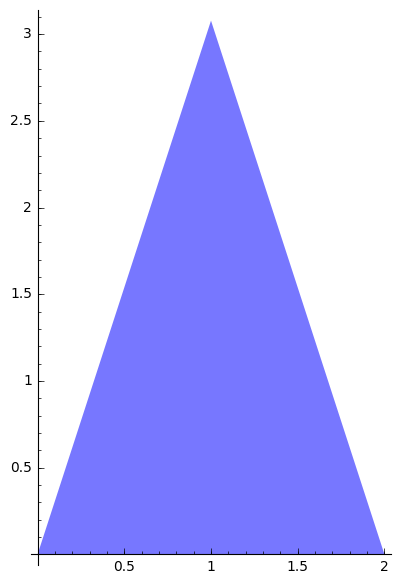

In [16]:
triABC = Polyhedron(vertices=[A,B,C])
# Render the polyhedron:
triABC_plot = triABC.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#77f'},aspect_ratio=1)
# Now actually draw it:
triABC_plot

In [17]:
D_prime = (2*cos_alpha)^2*A
show("D_prime=",D_prime)
D = V( (2-D_prime[0],D_prime[1]) )
show("D=",D)

'D_prime=' (-4*s^2 + 4, 8*s^3 - 6*s)

'D=' (4*s^2 - 2, 8*s^3 - 6*s)

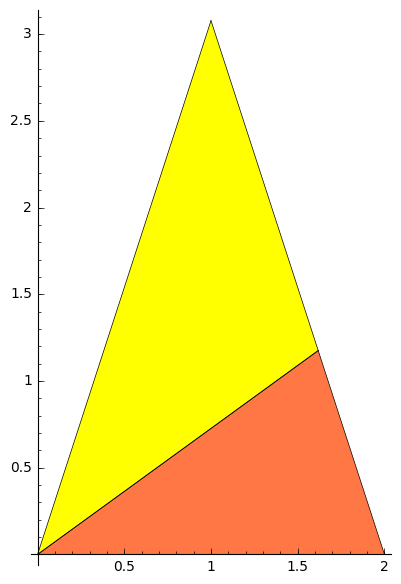

In [18]:
triBCD = Polyhedron([B,C,D])
triBCD_plot = triBCD.plot(point=False, line={"color":"black", "thickness":0.5}, fill=None, polygon={'rgbcolor':'#f74'},aspect_ratio=1)
triABD = Polyhedron([A,B,D])
triABD_plot = triABD.plot(point=False, line={"color":"black", "thickness":0.5}, fill=None, polygon={'rgbcolor':'#ff0'},aspect_ratio=1)
triBCD_plot + triABD_plot

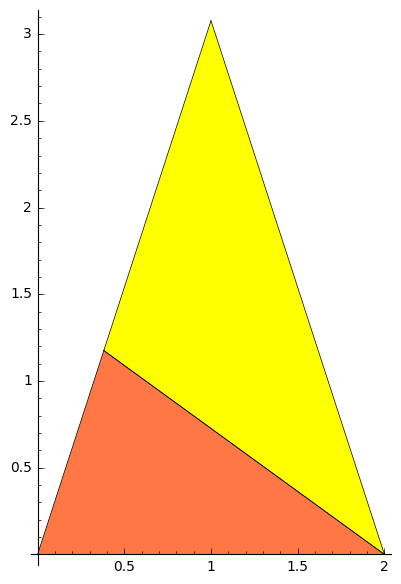

In [19]:
triBCDp = Polyhedron([B,C,D_prime])
triBCDp_plot= triBCDp.plot(point=False, line={"color":"black", "thickness":0.5}, fill=None, polygon={'rgbcolor':'#f74'},aspect_ratio=1)
triACDp = Polyhedron([A,C,D_prime])
triACDp_plot = triACDp.plot(point=False, line={"color":"black", "thickness":0.5}, fill=None, polygon={'rgbcolor':'#ff0'},aspect_ratio=1)
triBCDp_plot + triACDp_plot

We plot the two pictures side by side to show the implicit piecewise rotation:

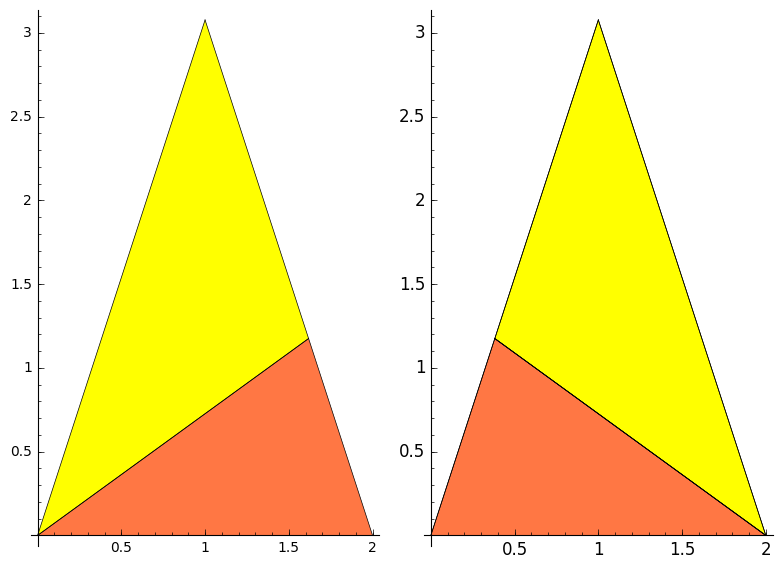

In [20]:
graphics_array([triBCD_plot.plot() + triABD_plot,\
                triBCDp_plot + triACDp_plot])

This just labels the points we have been discussing and the polygons and replots the picture above.
I used this in my notes.

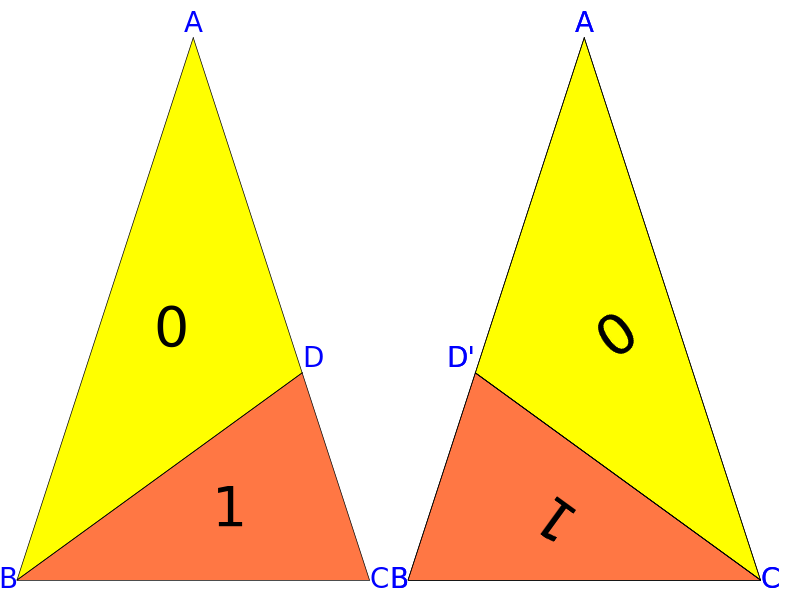

In [21]:
point_labels_1 = text("A",A, vertical_alignment="bottom", fontsize=20) + \
    text("B",B, horizontal_alignment="right", fontsize=20) + \
    text("C",C, horizontal_alignment="left", fontsize=20) + \
    text("D",D, horizontal_alignment="left", vertical_alignment="bottom", fontsize=20)
point_labels_2 = text("A",A, vertical_alignment="bottom", fontsize=20) + \
    text("B",B, horizontal_alignment="right", fontsize=20) + \
    text("C",C, horizontal_alignment="left", fontsize=20) + \
    text("D'",D_prime, horizontal_alignment="right", vertical_alignment="bottom", fontsize=20)
polygon_labels_1 = \
    text("0",triABD.center(), fontsize=40, color="black") + \
    text("1",triBCD.center(), fontsize=40, color="black")
polygon_labels_2 = \
    text("0",triACDp.center(), fontsize=40, color="black", rotation=-144) + \
    text("1",triBCDp.center(), fontsize=40, color="black", rotation=144)
ga = graphics_array([triBCD_plot.plot() + triABD_plot + point_labels_1 + polygon_labels_1,\
                triBCDp_plot + triACDp_plot + point_labels_2 + polygon_labels_2])
ga.show(axes=False)

The following generates the pictures above as SVG documents.

In [22]:
plt = triBCD_plot.plot() + triABD_plot + point_labels_1 + polygon_labels_1
plt.save_image("goetz_domain.pdf", axes=False)
plt = triBCDp_plot + triACDp_plot + point_labels_2 + polygon_labels_2
plt.save_image("goetz_codomain.pdf", axes=False)

The piecewise isometry is defined by two rotations. The first is a rotation by $-144$ degrees and sends `B` to `A`.

In [23]:
rotation_matrix_0 = matrix(K, [[cos_alpha^2-sin_alpha^2,2*cos_alpha*sin_alpha],[-2*cos_alpha*sin_alpha,cos_alpha^2-sin_alpha^2]])
translation_0 = A
def transformation_0(v):
    '''Apply a rotation by -144 degrees sending B to A to the vector v'''
    return translation_0+rotation_matrix_0*v

Check that it acts as we expect on our triangle and points:

In [24]:
show(transformation_0(triABD)==triACDp)
show(transformation_0(A)==C)
show(transformation_0(B)==A)
show(transformation_0(D)==D_prime)

True

True

True

True

The second is a rotation by $144$ degrees sending `B` to `C`.

In [25]:
rotation_matrix_1 = matrix(K, [[cos_alpha^2-sin_alpha^2,-2*cos_alpha*sin_alpha],[2*cos_alpha*sin_alpha,cos_alpha^2-sin_alpha^2]])
translation_1 = C
def transformation_1(v):
    '''Apply a rotation by -144 degrees sending B to A to the vector v'''
    return translation_1+rotation_matrix_1*v

Check that it acts as we expect on our triangles and points:

In [26]:
show(transformation_1(triBCD)==triBCDp)
show(transformation_1(B)==C)
show(transformation_1(C)==D_prime)
show(transformation_1(D)==B)

True

True

True

True

This defines the transformation we are considering:

In [27]:
def T(v):
    if triABD.contains(v):
        return transformation_0(v)
    else:
        return transformation_1(v)

The following code computes T-orbits of points.

In [28]:
def Torbit(v, n):
    '''Compute the first n points in the orbit of v.
    This is the list [v, T(v), T^2(v), ..., T^(n-1)(v)]
    '''
    orbit = [v]
    count = 1
    image = T(v)
    while count<n:
        orbit.append(image)
        image = T(image)
        count = count+1
    return orbit

We will compute the orbit of the following point:

In [29]:
pt = V( (1/4,1/4) )

Here are the first 10 points in the T-orbit.

In [30]:
Torbit(pt,10)

[(1/4, 1/4),
 (s^3 - 1/2*s^2 - 3/4*s + 5/4, 7*s^3 - 1/2*s^2 - 13/4*s + 1/4),
 (1/2*s^2 - 1/4*s + 13/8, 1/2*s^2 + 1/4*s - 3/8),
 (s^3 - 9/2*s^2 - 3/4*s + 17/4, 7*s^3 - 1/2*s^2 - 21/4*s + 1/4),
 (-7/2*s^2 - 1/4*s + 37/8, 1/2*s^2 + 9/4*s - 3/8),
 (1/2*s^2 + 1/4*s + 5/8, -8*s^3 + 1/2*s^2 + 31/4*s - 3/8),
 (-15/2*s^2 - 1/4*s + 61/8, 1/2*s^2 + 1/4*s - 3/8),
 (s^3 - 9/2*s^2 - 3/4*s + 21/4, 15*s^3 - 1/2*s^2 - 53/4*s + 1/4),
 (4*s^2 - 11/4, 16*s^3 - 14*s + 1/4),
 (s^3 - 17/2*s^2 - 3/4*s + 33/4, 15*s^3 - 1/2*s^2 - 45/4*s + 1/4)]

Now we compute the first 1000 points and plot them.

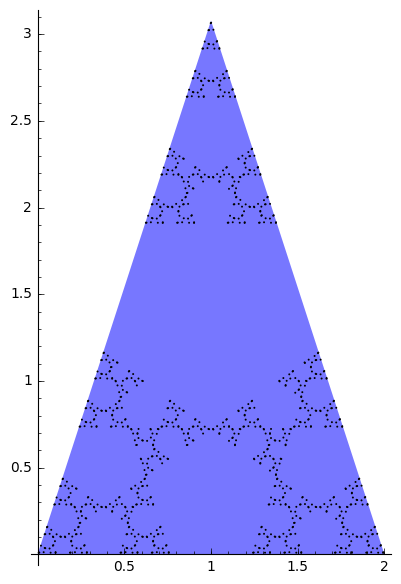

In [31]:
orbit = Torbit(pt,1000)
triABC_plot + point2d(points=orbit, zorder=10, size=2, color="black")

The following code now allows `T` to apply to both vectors and Polyhedra.

In [32]:
from sage.geometry.polyhedron.parent import Polyhedra
PolyhedraK = Polyhedra(K,2)
def T(v):
    if v.parent()==PolyhedraK:

        # v is a polyhedron with vertices in AA.

        # The following block of code decides whether the polyhedron v is
        # contained in triABD or trBCD.
        case = None
        # When we get through the following loop case will be 0 if
        # v is contained in triABD and will be 1 if v is contained
        # in triBCD.
        for vert in v.vertices():
            if triABD.contains(vert):
                if triBCD.contains(vert):
                    # vert is in both triangles. Do nothing.
                    pass
                else:
                    # vert is only in triABD.
                    if case == 1:
                        # In this case we found another vertex only in triBCD.
                        raise ValueError("Polyhedron intersects both the triangles ABD and BCD.")
                    case = 0
            else:
                if triBCD.contains(vert):
                    # ver is only in triBCD:
                    if case == 0:
                        # In this case we found another vertex only in triABD.
                        raise ValueError("Polyhedron intersects both the triangles ABD and BCD.")
                    case = 1
                else:
                    # vert is in neither triangle. 
                    raise ValueError("Polyhedron is not contained in triangle ABC.")

        if case is None:
            # The polyhedron must be contained in the segment BD.
            raise ValueError("Polyhedron is contained in segment BD where the map is undefined.")
        if case == 0:
            return transformation_0(v)
        else:
            return transformation_1(v)
    else:
        # Assume we have a polygon.
        if triABD.contains(v):
            return transformation_0(v)
        else:
            return transformation_1(v)

For example, we can now compute the image of `triABD`.

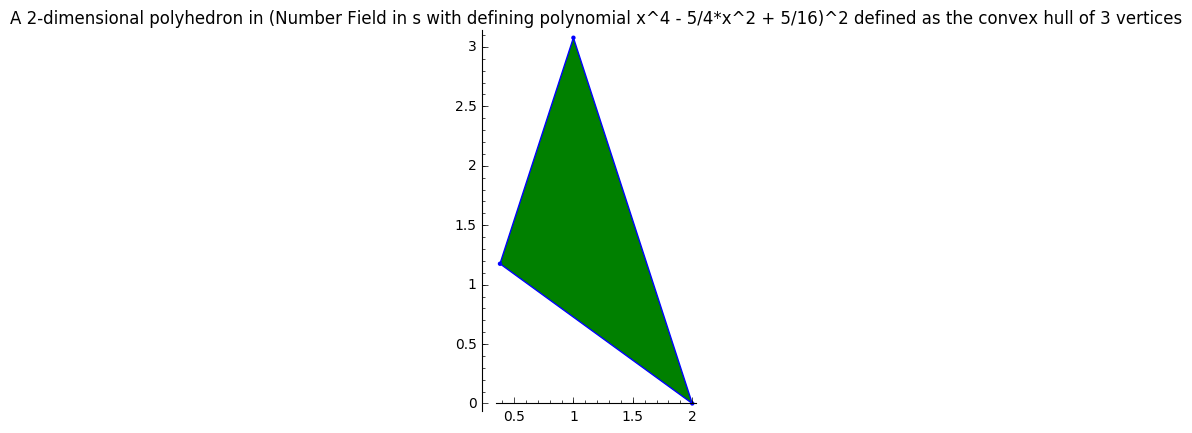

In [33]:
T(triABD)

It would be nice also to be able to use the inverse of T, so we work it out below:

In [34]:
def transformation_0_inv(v):
    # A ~ denotes the inverse.
    return (~rotation_matrix_0)*(v-translation_0)
def transformation_1_inv(v):
    # A ~ denotes the inverse.
    return (~rotation_matrix_1)*(v-translation_1)

In [35]:
def Tinv(v):
    if v.parent()==PolyhedraK:

        # v is a polyhedron with vertices in AA.

        # The following block of code decides whether the polyhedron v is
        # contained in triABD or trBCD.
        case = None
        # When we get through the following loop case will be 0 if
        # v is contained in triABD and will be 1 if v is contained
        # in triBCD.
        for vert in v.vertices():
            if triACDp.contains(vert):
                if triBCDp.contains(vert):
                    # vert is in both triangles. Do nothing.
                    pass
                else:
                    # vert is only in triABD.
                    if case == 1:
                        # In this case we found another vertex only in triBCD.
                        raise ValueError("Polyhedron intersects both the triangles ABD and BCD.")
                    case = 0
            else:
                if triBCDp.contains(vert):
                    # ver is only in triBCD:
                    if case == 0:
                        # In this case we found another vertex only in triABD.
                        raise ValueError("Polyhedron intersects both the triangles ABD and BCD.")
                    case = 1
                else:
                    # vert is in neither triangle. 
                    raise ValueError("Polyhedron is not contained in triangle ABC.")

        if case is None:
            # The polyhedron must be contained in the segment BD.
            raise ValueError("Polyhedron is contained in segment BD where the map is undefined.")
        if case == 0:
            return transformation_0_inv(v)
        else:
            return transformation_1_inv(v)
    else:
        # Assume we have a polygon.
        if triACDp.contains(v):
            return transformation_0_inv(v)
        else:
            return transformation_1_inv(v)

This is a convienience function to evaluate $T^n(v)$:

In [36]:
def Tpower(v,n):    
    assert n in ZZ, "n must be an integer"
    if n == 0:
        return v
    if n > 0:
        while n > 0:
            v = T(v)
            n = n-1
        return v
    if n < 0:
        while n < 0:
            v = Tinv(v)
            n = n+1
        return v

## Symbolic Dynamics

In [37]:
def Tcode(v,n):
    # iterate over i=0,..,n-1.
    code = []
    for i in xrange(n):
        next_code=-1
        if triABD.contains(v):
            next_code += 1
        if triBCD.contains(v):
            next_code += 2
        assert next_code != -1, "The vector v lies outside triangle ABC."
        code.append(next_code)
        if i<n-1:
            # Iterate
            if next_code==0:
                v = transformation_0(v)
            elif next_code==1:
                v = transformation_1(v)
            else:
                raise ValueError("Attempting to iterate point on segment BD.")
    return code

We can compute the code of the point $(1,2)$ visually below. Observe it is
$$0,1,1,1,0.$$

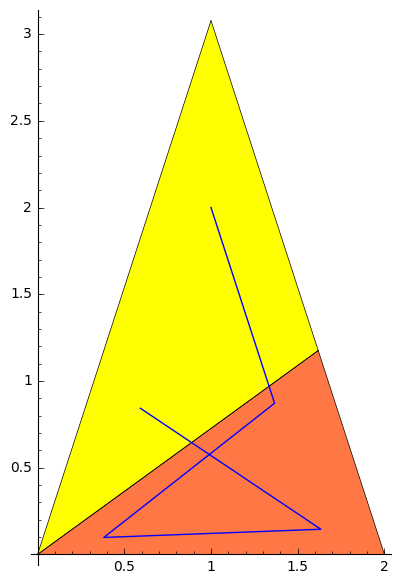

In [38]:
pt = V((1,2))
triABD_plot + triBCD_plot + line2d(Torbit(pt,5))

In [39]:
code = Tcode(pt,5)
code

[0, 1, 1, 1, 0]

In [40]:
def Tcell(code):
    if len(code)==0:
        return triABC
    if code[0]==0:
        p = triABD
    else:
        p = triBCD
    # code[1:] returns the sublist beginning at 1 and running until the end.
    for a in code[1:]:
        # iterate from i=1 to len(code)-1.

        # Push p forward under the map
        p = T(p)
        if a == 0:
            p = triABD.intersection(p)
        else:
            p = triBCD.intersection(p)
    # We will have pushed forward under the map len(code)-1 times.
    return Tpower(p, 1-len(code))

The following computes the cell $Y_{\hat 1 1}$.

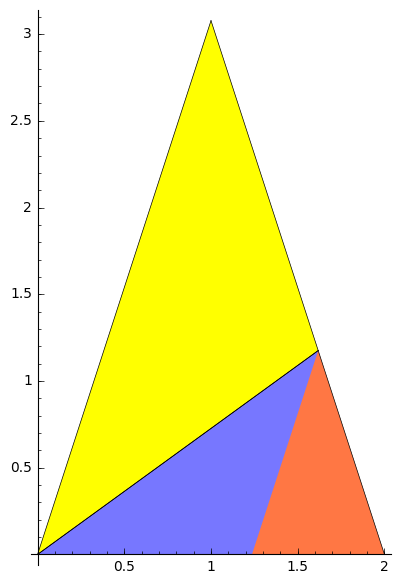

In [41]:
Y11 = Tcell([1,1])
Y11_plot = Y11.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#77f'})
triABD_plot + triBCD_plot + Y11_plot

The image of $Y_{\hat 1 1}$ under $T$ will be called `TY11`. In the notes this is also $Y_{1 \hat 1}$. Observe that $Y_{\hat 1 1}$ returns under one iteration to region $1$.

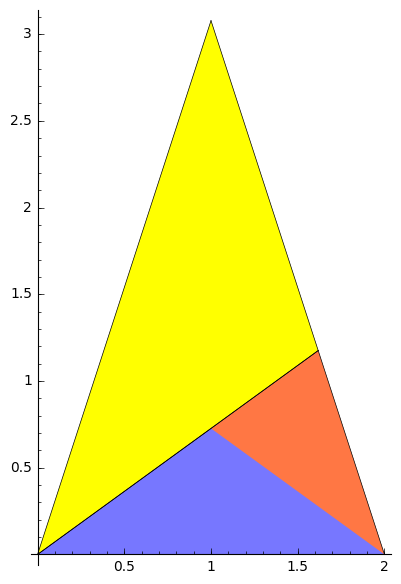

In [42]:
TY11 = T(Y11)
TY11_plot = TY11.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#77f'})
triABD_plot + triBCD_plot + TY11_plot

The following computes the cell $Y_{\hat 1 0}$.

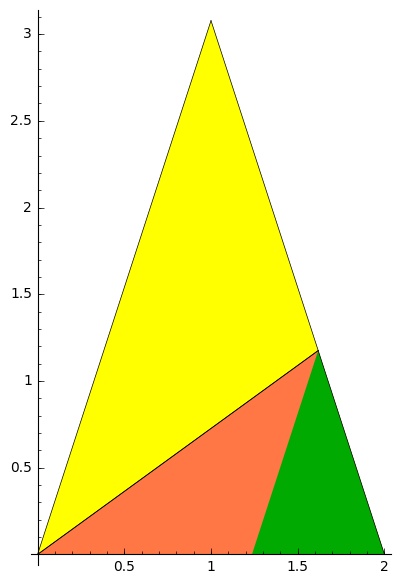

In [43]:
Y10 = Tcell([1,0])
Y10_plot = Y10.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#0a0'})
triABD_plot + triBCD_plot + Y10_plot

We'll denote the image of $Y_{\hat 1 0}$ under $T$ by `TY10`. In the notes this was $Y_{1 \hat 0}$.

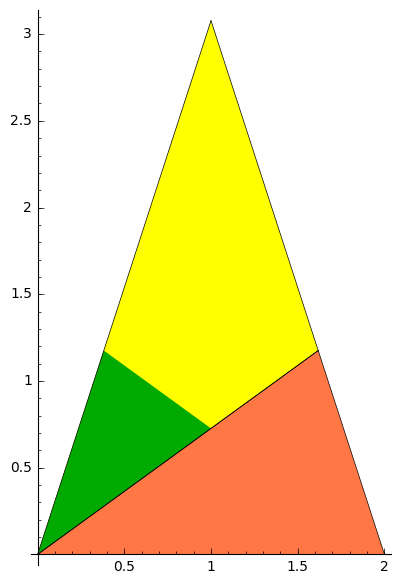

In [44]:
TY10 = T(Y10)
TY10_plot = TY10.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#0a0'})
triABD_plot + triBCD_plot + TY10_plot

We'll denote the image of $Y_{\hat 1 0}$ under $T^2$ by `T2Y10`. In the notation in the notes this is $Y_{1 0 \hat 0}$, because all points of $Y_{1 \hat 0}$ move into region $0$ under $T$.

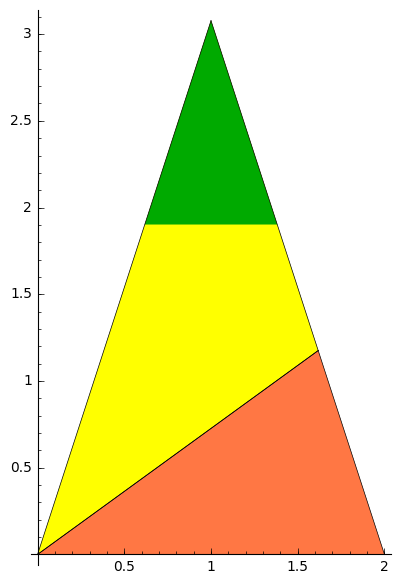

In [45]:
T2Y10 = T(TY10)
T2Y10_plot = T2Y10.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#0a0'})
triABD_plot + triBCD_plot + T2Y10_plot

We'll denote the image of $Y_{\hat 1 0}$ under $T^3$ by `T3Y10`. In the notation in the notes this is $Y_{1 0 0 \hat 1}$, because all points of $Y_{1 0 \hat 0}$ move into region $1$ under $T$. Observe that $T^3(Y_{\hat 1 0})$ region returns to region $1$.

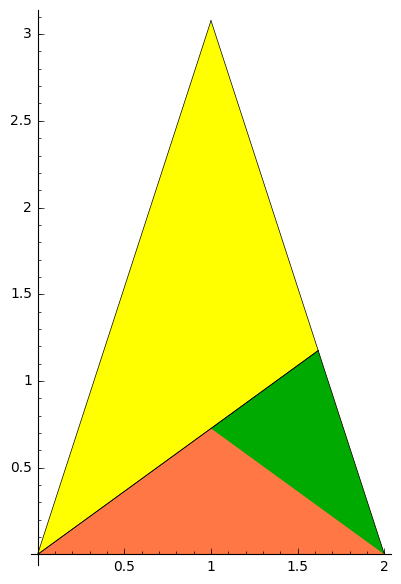

In [46]:
T3Y10 = T(T2Y10)
T3Y10_plot = T3Y10.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#0a0'})
triABD_plot + triBCD_plot + T3Y10_plot

We can now see the first return map to $Y_{\hat 1}$. 

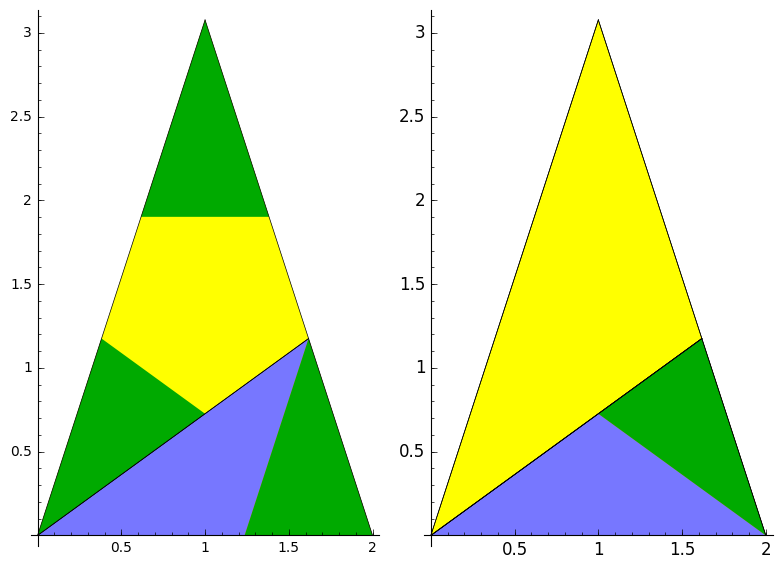

In [47]:
graphics_array([triABD_plot + triBCD_plot + Y11_plot + Y10_plot + TY10_plot + T2Y10_plot, \
                triABD_plot + triBCD_plot + TY11_plot + T3Y10_plot])

In [48]:
plt = triABD_plot + triBCD_plot + Y11_plot + Y10_plot + TY10_plot + T2Y10_plot
plt.save_image("goetz_return_domain.svg", axes=False)
plt = triABD_plot + triBCD_plot + TY11_plot + T3Y10_plot
plt.save_image("goetz_return_codomain.svg", axes=False)

In [49]:
point_labels = \
    text("B",B, horizontal_alignment="right", fontsize=20) + \
    text("C",C, horizontal_alignment="left", fontsize=20) + \
    text("D",D, horizontal_alignment="left", vertical_alignment="bottom", fontsize=20)

In [50]:
plt = Y11_plot + Y10_plot + point_labels
plt.save_image("goetz_return_domain2.svg", axes=False)
plt = TY11_plot + T3Y10_plot + point_labels
plt.save_image("goetz_return_codomain2.svg", axes=False)

## The renormalization

The orientation reversing similarity $\Psi$ carries $\triangle BDC$ to $\triangle ABC$. This means it carries the vector $\overrightarrow{BC}$ to $\overrightarrow{AC}$. This gives two entries of the matrix $D \Psi$ (which is a matrix independent of the point at which it is evaluated because $\Psi$ is a similarity).

In [51]:
psix = (C-A)[0]/2
psix

1/2

In [52]:
psiy = (C-A)[1]/2
psiy

-4*s^3 + 2*s

The other entries of the matrix $D\Psi$ follow because it is an orientation reversing similarity.

In [53]:
Psi_matrix = matrix([\
                    [psix, psiy], \
                    [psiy, -psix]])

Since $\Psi$ carries $B$ to $A$ we know that $A$ gives the translational part. Thus we can define:

In [54]:
def Psi(v):
    return Psi_matrix*v+A

We check that $\Psi$ acts correctly on the vertices.

In [55]:
print(Psi(B)==A)
print(Psi(D)==B)
print(Psi(C)==C)

True
True
True


We will now check that the renormalization works:

In [56]:
Psi(T(Y11))==T(Psi(Y11))

True

In [57]:
Psi(Tpower(Y10,3))==T(Psi(Y10))

True

We observe that the similarity scales distances by the golden mean:

In [58]:
for ev in Psi_matrix.eigenvalues():
    print ev.n()

1.61803398874989
-1.61803398874989


The following gives $\Psi^{-1}$.

In [59]:
def Psi_inv(v):
    return ~Psi_matrix*(v-A)

## Periodic orbits

The yellow pentagon in the above image can be seen to be the points that stay forever in region $0$.
This is the region consisting of points whose codes consist of zeros forever. We observe that having a code in the cylinder set $C(\hat 0 0 0)$ is sufficient to lie in this pentagon. 
The following computes the region denoted $P=Y_{\hat 0 0 0}$ in the notes. We check that the cell is fixed by $T$. (This means that the center is fixed, while other points cycle around with period $5$.)

True


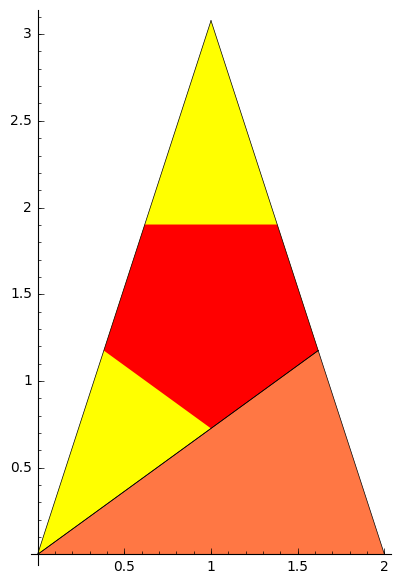

In [60]:
P = Tcell([0,0,0])
print(T(P)==P) # Print true if P is fixed by T.
P_plot = P.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#f00'})
triABD_plot + triBCD_plot + P_plot

We can construct new peridic pentagons by applying $\Psi^{-k}$. The following constructs the first six periodic pentagons like this by choosing $k \in \{0, 1,2, \ldots, 10\}.$

In [61]:
P_list = [P]
for i in xrange(1,9):
    P_list.append(Psi_inv(P_list[-1]))

We plot the pentagons we found:

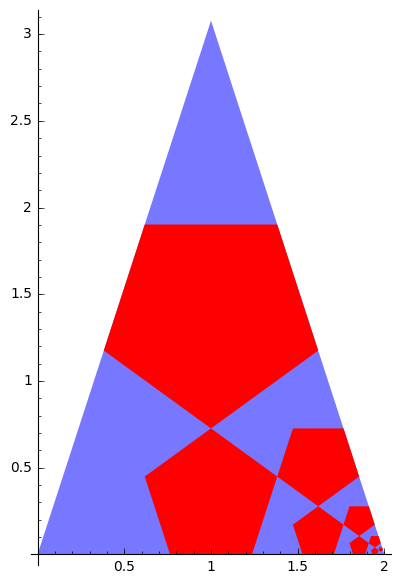

In [62]:
P_list_plot = Graphics()
for pentagon in P_list:
    P_list_plot += pentagon.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#F00'})
triABC_plot + P_list_plot

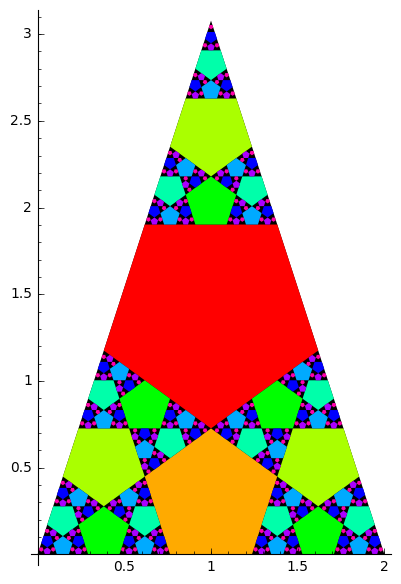

In [63]:
all_pentagon_plot = Graphics()
for count,pentagon in enumerate(P_list):
    hue = (ZZ(count)/len(P_list)).n()
    all_pentagon_plot += pentagon.plot(wireframe=False, fill=None, polygon={'hue':hue})
    image = T(pentagon)
    while image!=pentagon:
        all_pentagon_plot += image.plot(wireframe=False, fill=None, polygon={'hue':hue})
        image = T(image)
plt = triABC.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#000'}) + all_pentagon_plot
plt

In [64]:
plt.save_image("fractal.pdf",axes=False)

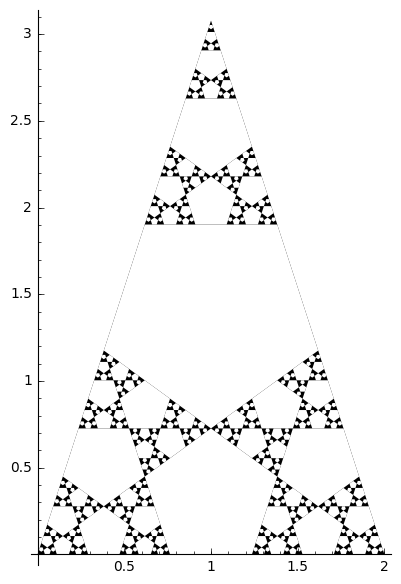

In [65]:
all_pentagon_plot = Graphics()
for pentagon in P_list:
    all_pentagon_plot += pentagon.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#fff'})
    image = T(pentagon)
    while image!=pentagon:
        all_pentagon_plot += image.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#fff'})
        image = T(image)
plt = triABC.plot(wireframe=False, fill=None, polygon={'rgbcolor':'#000'}) + all_pentagon_plot
plt

In [66]:
plt.save_image("fractal_bw.pdf",axes=False)